# Thermostat Regions of Interest
First by using the [Extract Digital Screen](http://localhost:8888/doc/tree/klupps/ExtractDigitalScreen(2%20of%206).ipynb) step we get the screen of the thermostat. From the screen we try to extract the regions of interest and we put them in a dictionary. Currently, our regions of interest are <span style="color: red">temperature</span>, <span style="color: lightgreen">power</span>, <span style="color: yellow">day_on</span>, <span style="color: purple">night_on</span>, <span style="color: blue">auto_on</span>

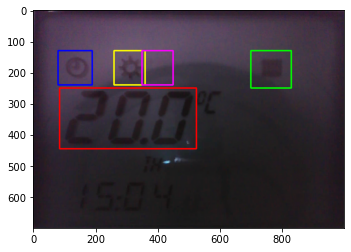
## Imports

In [2]:
### import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import cv2

from kluppspy.devices import thermostat as thm
from kluppspy.devices.esp32 import cam
from kluppspy.cv import utils as cvu

## Load the Test images
Also extract the screen to be ready for processing

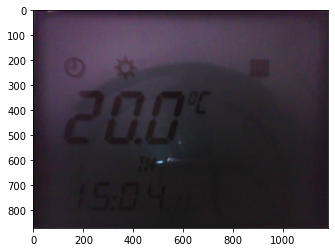

In [3]:
# Test images dir
dir_path = "../images/Kar39Thermostat/"

ims = cam.dir_images(dir_path)
im = next(ims)
im = next(ims)
im = next(ims)
im = next(ims)
im = next(ims)
im = next(ims)
screen_im = thm.extract_screen(im)
plt.imshow(screen_im)

## Get Regions Boundaries
Currently, we define the regions manualy because we deal with only one thermostat and we are trying to keep the things simple for our first implementation. This will help us collect data. First we resize every disply to the same resolution `1000x700`. See the defined regions in the code block below: 

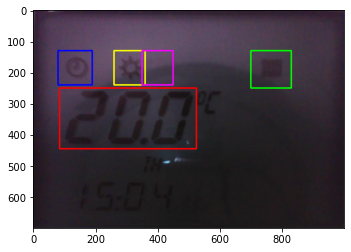

In [4]:
def to_rect(left, top, right, bottom):
    """
    Find the four edge points of a rectangle from boundaries.
    """
    return np.array([
        [[left, top]], 
        [[right, top]], 
        [[right, bottom]], 
        [[left, bottom]]
    ])


def get_regions(im):
    """
    Get Regions of Interest boundaries from thermostat screen Valliant.
    Please not that you will have to provide screen of size `1000x700`
    because the boundaries are set manually for the given thermostat model.
    
    @param im thermostat screen
    """
    regions = {
        "temperature": to_rect(85, 250, 525, 445),
        "power": to_rect(700, 130, 830, 250),
        "auto_on": to_rect(80, 130, 190, 240),
        "day_on": to_rect(260, 130, 360, 240),
        "night_on": to_rect(350, 130, 450, 240),
    }
    return regions


def im_with_regions(im):
    """
    This is just a showcase function
    """
    screen_im = thm.extract_screen(im)
    im_fix = cv2.resize(screen_im, (1000, 700))
    regions = get_regions(im_fix)
    final_im = im_fix.copy()
    
    cv2.drawContours(final_im, [regions['temperature']], -1, (255, 0, 0), 3)
    cv2.drawContours(final_im, [regions['power']], -1, (0, 255, 0), 3)
    cv2.drawContours(final_im, [regions['auto_on']], -1, (0, 0, 255), 3)
    cv2.drawContours(final_im, [regions['day_on']], -1, (255, 255, 0), 3)
    cv2.drawContours(final_im, [regions['night_on']], -1, (255, 0, 255), 3)
    return final_im

    
plt.imshow(im_with_regions(im))

## Extract Regions
Here we get extract the regions from the region boundaries for this we use the 4-point transform explained in the [Extract Digital Screen](http://localhost:8888/doc/tree/klupps/ExtractDigitalScreen(2%20of%206).ipynb).

Show Images


100%|██████████| 5/5 [00:00<00:00, 507.09it/s]


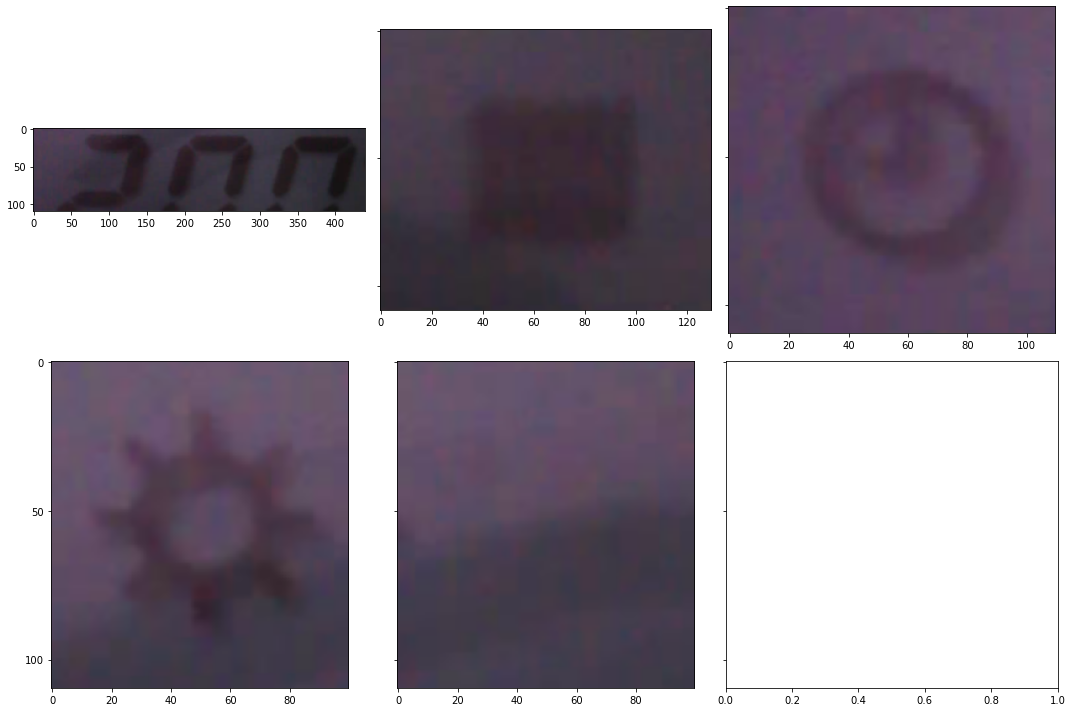

In [5]:
def extract_regions(im):
    """
    Extract regions of interest from a Valliant thermostat return them in a dictionary.
    The values are images of the regions while the keys are (`temperature`, `power`, `day_on`, `night_on`, `auto_on`)
    
    @param im image of a Valliant thermostat
    """
    screen_im = thm.extract_screen(im)
    screen_im = cv2.resize(screen_im, (1000, 700))
    regions = get_regions(screen_im)
    
    region_ims = {}
    for name, cnt in regions.items():
        region = cvu.four_point_transform(screen_im, cnt[:, 0, :])
        region_ims[name] = region
    return region_ims

region_ims = extract_regions(im)
cvu.show_images(region_ims.values(), 3)

## Test

Process Images


100%|██████████| 12/12 [00:00<00:00, 36.69it/s]


Show Images


100%|██████████| 12/12 [00:00<00:00, 99.48it/s] 


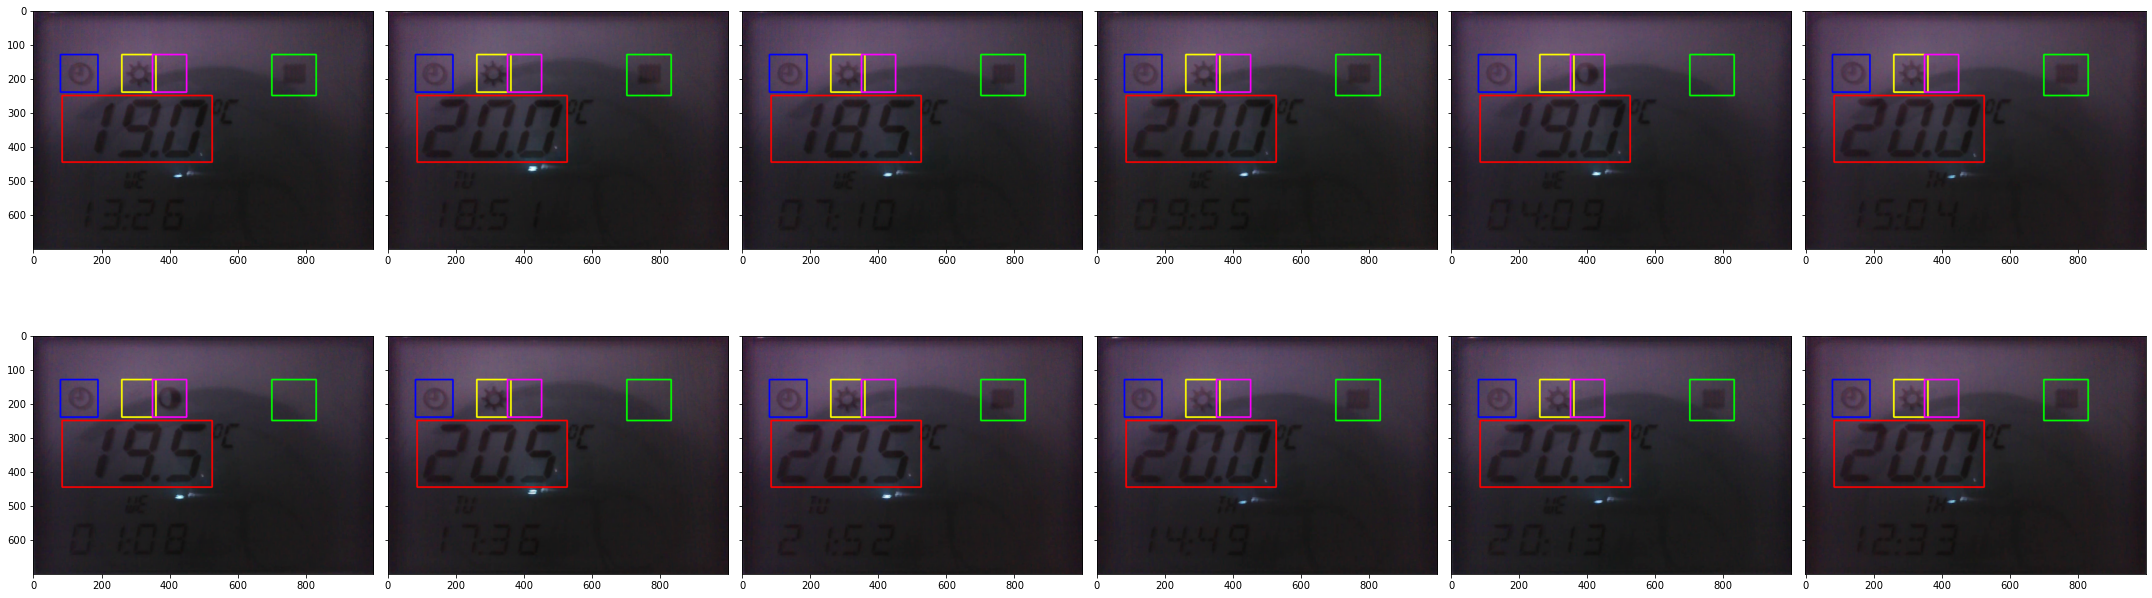

In [6]:
cvu.image_test(cam.dir_images, im_with_regions, dir_path)

## Library Usage

Show Images


100%|██████████| 5/5 [00:00<00:00, 616.70it/s]


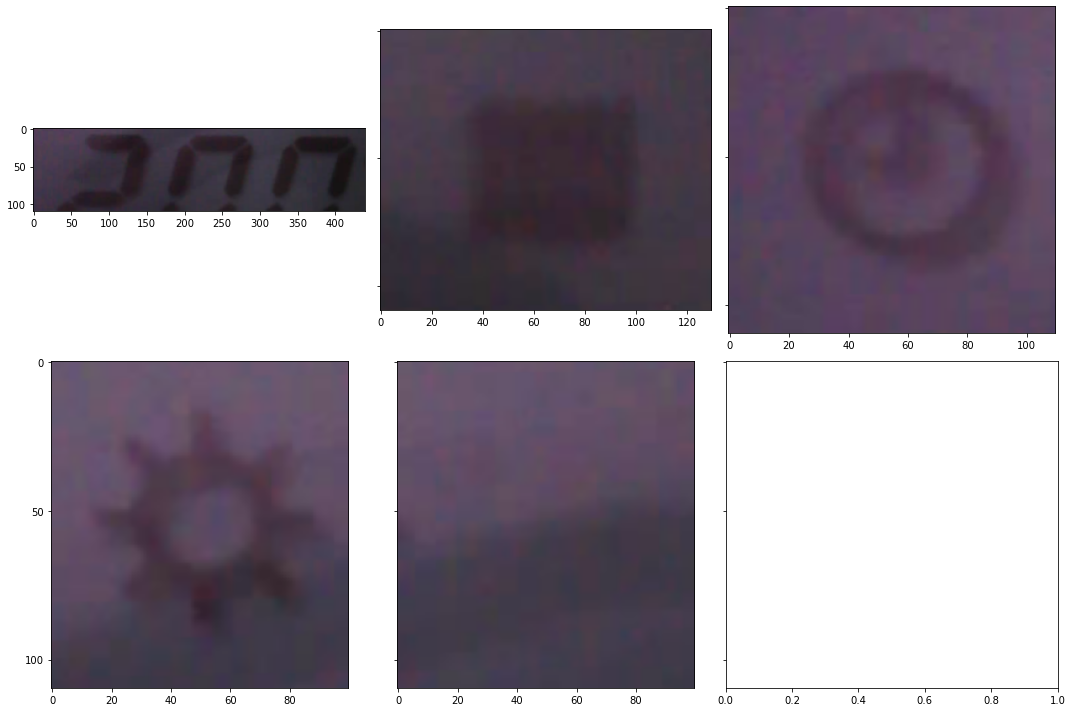

In [8]:
region_ims = thm.extract_regions(im)
cvu.show_images(region_ims.values(), 3)